# Houses Prices Project

## Jorge Veiras Yanes

### 29-07-2022

![modern.jpg](modern.jpg)

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Introduction

Thousands of houses are sold everyday, and it cames as no surprise that buyers ask themselves questions such as: Am I paying a fair price? Which would be the appropiate price for this house? Which parameters affect the most at the time of buying a house? Is the right time for buying a house?

In this project a prediction of the *SalePrice* of a large dataset (test data) of houses will be made by training machine learning models from a training data set. Parameters such as the street, bulding year, size of rooms, number of rooms and garage will be decisive at the time of estimating the final price of the building

The main objectives of the project are:

- Apply data preprocessing and preparation techniques in order to obtain clean data.
- Build machine learning models able to predict house price based on house features.
- Analyse and compare models performance in order to choose the best model.

# Index

1. [Exploratory Data Analysis](#Exploratory-Data-Analysis)<br>
2. [Preparing data](#Preparing-data)<br>
    2.1 [Preparing training data](#Preparing-training-data)<br>
    2.2 [Preparing test data](#Preparing-test-data)<br>
    2.3 [Handle categorical features](#Handle-categorical-features)<br>
3. [Results](#Results)<br>
    3.1 [Linear Regression](#Linear-Regression)<br>
    3.2 [Nearest Neighbors](#Nearest-Neighbors)<br>
    3.3 [Decision Tree](#Decision-Tree)<br>
    3.4 [Random Forest](#Random-Forest)<br>
    3.5 [Neural Networks](#Neural-Networks)<br>
4. [Discussion](#Discussion)<br>
5. [Conclusion](#Conclusion)<br>



---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Exploratory Data Analysis

In [1]:
#Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.style as style
import seaborn as sns
from scipy.stats import norm
from scipy import stats

In [2]:
train_df=pd.read_csv('train.csv')

In [3]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Now, we are going to explore the data to see which parameters contribute the most to our final price. These parameters will be the ones we will consider most at the time of training our machine learning models.

We can make this fast analysis by studying the square correlation coefficient ($r^2$) which measures the proportion of variation in a dependent variable that can be attributed to an independent variable (we assume linear correlation).

In [4]:
train_df.corr(method='pearson')['SalePrice'].sort_values(ascending=False)  #We analyse SalePrice correlations

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

We see that the *OverallQual* column almost follows a large positive linear association, so the points are close to the linear trend line. However, most of the parameters obey a small positive linear association. Thus, we can conclude that, in general, there is no linear trend correlation between the *SalePrice* and the rest of columns.

We are going to graph the data to have an idea of the distribution it follows.

In [5]:
def grapher(df, feature):
    style.use('fivethirtyeight')  #Plot style sheet
    
    fig=plt.figure(constrained_layout=True, figsize=(12,8))   #Creating plot 
    grid=gridspec.GridSpec(ncols=3, nrows=3, figure=fig)
    
    p1=fig.add_subplot(grid[0, :2])   
    p1.set_title('Histogram')
    sns.distplot(df.loc[:, feature], norm_hist=True, ax=p1) #Histogram
    
    p2=fig.add_subplot(grid[1, :2])
    p2.set_title('Q-Q plot')
    stats.probplot(df.loc[:, feature], plot=p2) #Quantile-quantile plot
    
    p3=fig.add_subplot(grid[:, 2])
    p3.set_title('Box plot')
    sns.boxplot(df.loc[:, feature], orient='v', ax=p3) #Box plot

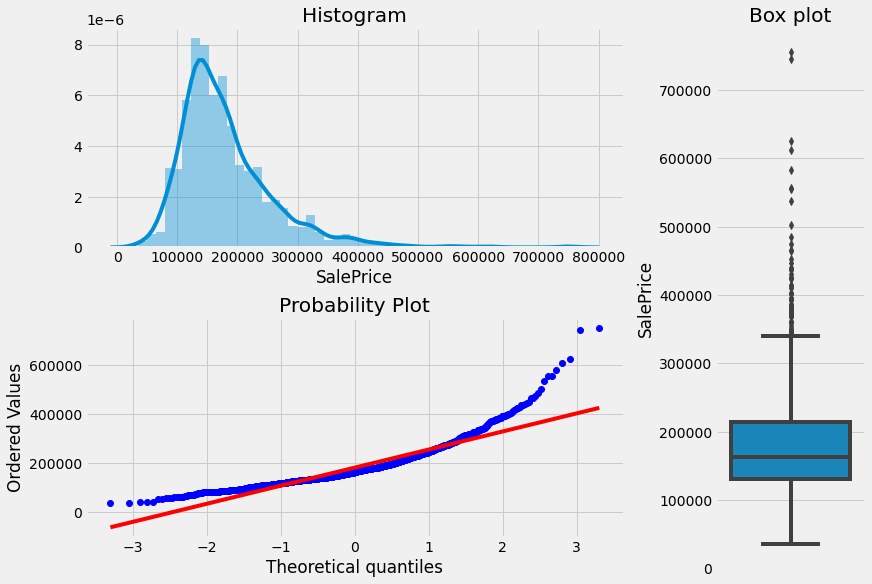

In [6]:
grapher(train_df, 'SalePrice')

Graphically, we can see in the `Quantile-quantile plot` that linear regression may not be an accurate model to predict the data. Furthermore, the `histogram plot` is skewed, we do not have a normal distribution. In `Box plot` we can also see some outliers.

As it is done in lots of physics problems to linearize data, we can try to apply logarithms so that data follows a more linear behaviour.

In [7]:
train_df['SalePrice']=np.log(train_df['SalePrice'])

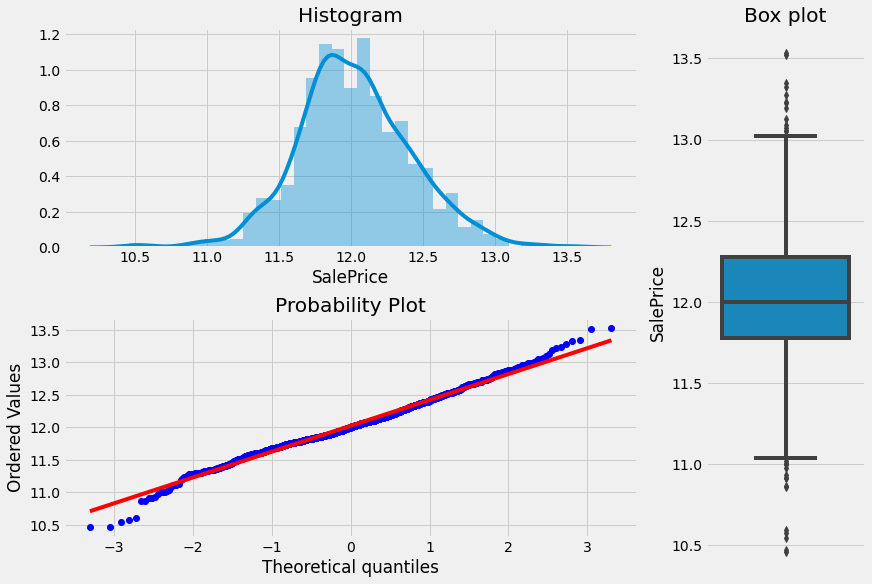

In [8]:
grapher(train_df, 'SalePrice')

Working with logarithms, apparently, makes regression model a good candidate to predict the sale price. Moreover, we managed to get a normal distribution of the data, and in the box plot the number of outliers has been reduced significantly.

It is important to achieve normality because several statistic tests rely on this. Also, by achieving normality, we avoid a lot of other problems such as heteroscedacity (it invalidates statistical tests of significance that assume that the modelling errors all have the same variance).

We want our variables to be homoscedastics as we want the error term to be the same across all values of the independent variables.

'Assuming a variable is homoscedastic when in reality it is heteroscedastic results in unbiased but inefficient point estimates and in biased estimates of standard errors, and may result in overestimating the goodness of fit as measured by the Pearson coefficient.'

If we analyse the column *OverallQual*:

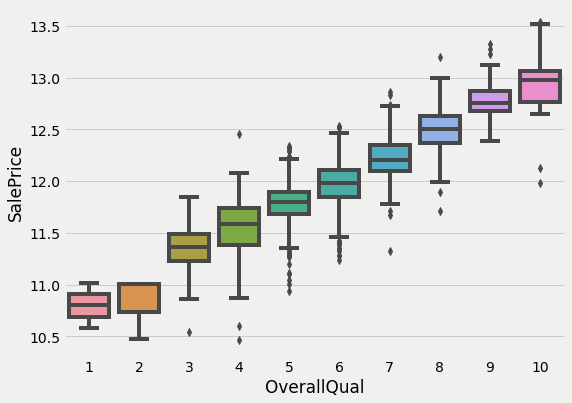

In [9]:
var = 'OverallQual'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)

We can see graphically that there is a positive correlation between *OverallQual* and *SalePrice*. Let's observe this numerically:

In [10]:
train_df.corr(method='pearson')['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.817184
GrLivArea        0.700927
GarageCars       0.680625
GarageArea       0.650888
TotalBsmtSF      0.612134
1stFlrSF         0.596981
FullBath         0.594771
YearBuilt        0.586570
YearRemodAdd     0.565608
GarageYrBlt      0.541073
TotRmsAbvGrd     0.534422
Fireplaces       0.489449
MasVnrArea       0.430809
BsmtFinSF1       0.372023
LotFrontage      0.355878
WoodDeckSF       0.334135
OpenPorchSF      0.321053
2ndFlrSF         0.319300
HalfBath         0.313982
LotArea          0.257320
BsmtFullBath     0.236224
BsmtUnfSF        0.221985
BedroomAbvGr     0.209044
ScreenPorch      0.121208
PoolArea         0.069798
MoSold           0.057329
3SsnPorch        0.054900
BsmtFinSF2       0.004832
BsmtHalfBath    -0.005149
Id              -0.017942
MiscVal         -0.020021
OverallCond     -0.036868
YrSold          -0.037263
LowQualFinSF    -0.037963
MSSubClass      -0.073959
KitchenAbvGr    -0.147548
EnclosedPorch   -0.149050
Name: SalePr

As we expected, the column *OverallQual* follows a large positive correlation. However, what about the correlation between different columns?

We can analyse this by plotting a correlation matrix in a heatmap:

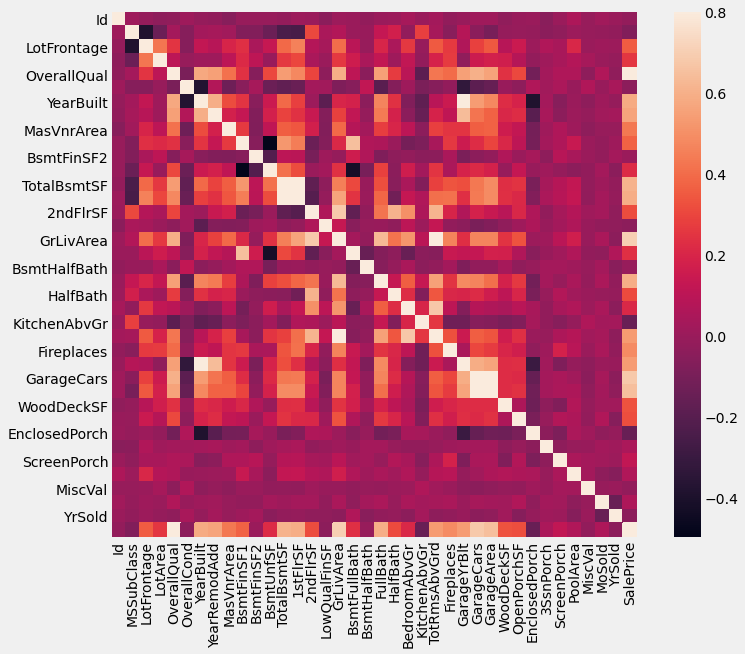

In [11]:
#correlation matrix
corrmat = train_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In white colour it is shown the columns which are most correlated. Obviously, the main diagonal of the map is white because two identical columns are trivially correlated. However, if we observe the map with more detail, we can see that the columns *TotalBsmtSF* and *1stFlrSF* are highly correlated. Same happens with *GarageCars* and *GarageArea*. 

This strong correlation may indicate us that there is a situation of multicollinearity (they give almost the same information).

With the heatmap, we can observe the *SalePrice* correlations as we did before, but graphically:

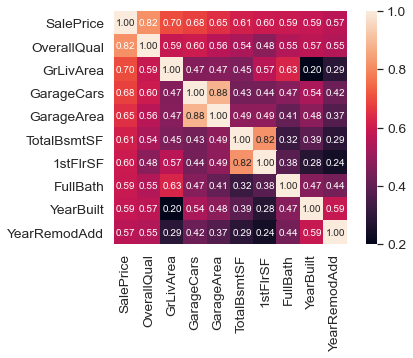

In [12]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train_df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

This map confirms what we saw numerically. The *OverallQual* column is strongly correlated with *SalePrice*. Nevertheless, with this map we can also see that the correlation between *GarageArea* and *GarageCars* is higher than between *OverallQual* and *SalePrice*.

Let's make a plot of the *SalePrice* column and the correlated variables we were seeing. 

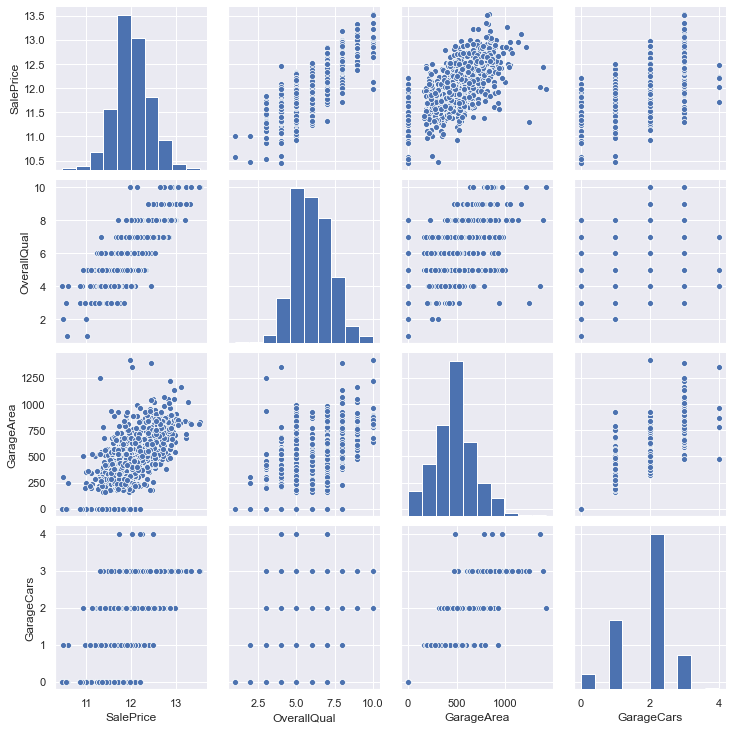

In [13]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GarageArea', 'GarageCars']
sns.pairplot(train_df[cols], height = 2.5)
plt.show();

We can clearly see the linear tendency between the *SalePrice* and *OverallQual* columns, as well as, between the *GarageArea* and *GarageCars* columns.

We can analyse the *GrLivArea* which is the second column which is most correlated with *SalePrice* 

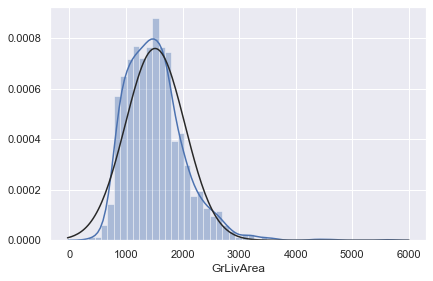

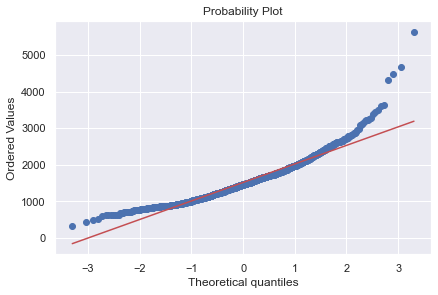

In [14]:
#histogram and normal probability plot
sns.distplot(train_df['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(train_df['GrLivArea'], plot=plt)

We see that data is skewed. Thus, we can try to apply logarithms to linearize the data:

In [15]:
train_df['GrLivArea'] = np.log(train_df['GrLivArea'])

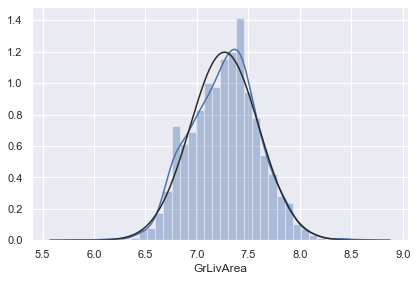

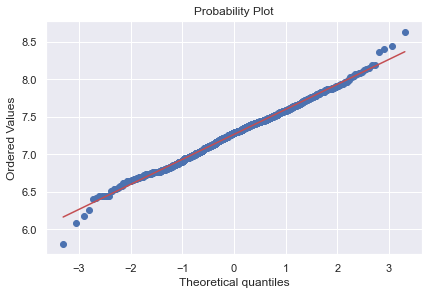

In [16]:
#transformed histogram and normal probability plot
sns.distplot(train_df['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(train_df['GrLivArea'], plot=plt)

We have linearised the data of the parameters that follow almost a positive linear correlation with the *SalePrice*.

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Preparing data

## Preparing training data

First of all, we are going to print all the parameters we are going to work with:

In [17]:
train_df.TotalBsmtSF.dtype

dtype('int64')

In [18]:
train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

Now, we must rule out possible null values that mat negatively affect our analysis.

In [19]:
train_df.isnull()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1456,False,False,False,False,False,False,True,False,False,False,...,False,True,False,True,False,False,False,False,False,False
1457,False,False,False,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1458,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False


At first sight, in the previous table, it is shown that `Alley`, `PoolQC`, `Fence`, `MiscFeature` have missing values. However, we do not have more information. 

Now we will print exactly which columns have nule values, and how many nule values they do contain.

In [20]:
obj=train_df.isnull().sum().sort_values(ascending=False)   #Nule values
for key,value in obj.iteritems():
    if value != 0:                                          
        print(key,",",value, ",", ' %% missing: %.2f %%' %(value/1460*100))

PoolQC , 1453 ,  % missing: 99.52 %
MiscFeature , 1406 ,  % missing: 96.30 %
Alley , 1369 ,  % missing: 93.77 %
Fence , 1179 ,  % missing: 80.75 %
FireplaceQu , 690 ,  % missing: 47.26 %
LotFrontage , 259 ,  % missing: 17.74 %
GarageCond , 81 ,  % missing: 5.55 %
GarageType , 81 ,  % missing: 5.55 %
GarageYrBlt , 81 ,  % missing: 5.55 %
GarageFinish , 81 ,  % missing: 5.55 %
GarageQual , 81 ,  % missing: 5.55 %
BsmtExposure , 38 ,  % missing: 2.60 %
BsmtFinType2 , 38 ,  % missing: 2.60 %
BsmtFinType1 , 37 ,  % missing: 2.53 %
BsmtCond , 37 ,  % missing: 2.53 %
BsmtQual , 37 ,  % missing: 2.53 %
MasVnrArea , 8 ,  % missing: 0.55 %
MasVnrType , 8 ,  % missing: 0.55 %
Electrical , 1 ,  % missing: 0.07 %


Those parameters in which there is more than a 50% of missing values, are going to be dropped, due to the fact that we do not have much information about how we can fill them. However, those parameters who have a less percentage of missing values are going to be filled as follows:

- If the parameter's values are `int` or `float` type, we will replace these missing values by the mean value of the column.
- If the parameter's value are `str` type, they will be replaced by the mode value.


In the previous section, we came to the conclusion that Garage columns were strongly correlated, and we were thinking about the possibility of multicollinearity existance. Here, we see that the number of missing values in garage columns are exactly same. This leads us to think that these missing data refers to the same set of observations.

So, we are going to drop all garage columns except *GarageCars* column, which will be the one we will be working with.

From the missing values list, we can also see that the columns *BsmtX* seem to be refered to the same set of observations. 
Let's analyse if they are strongly correlated:

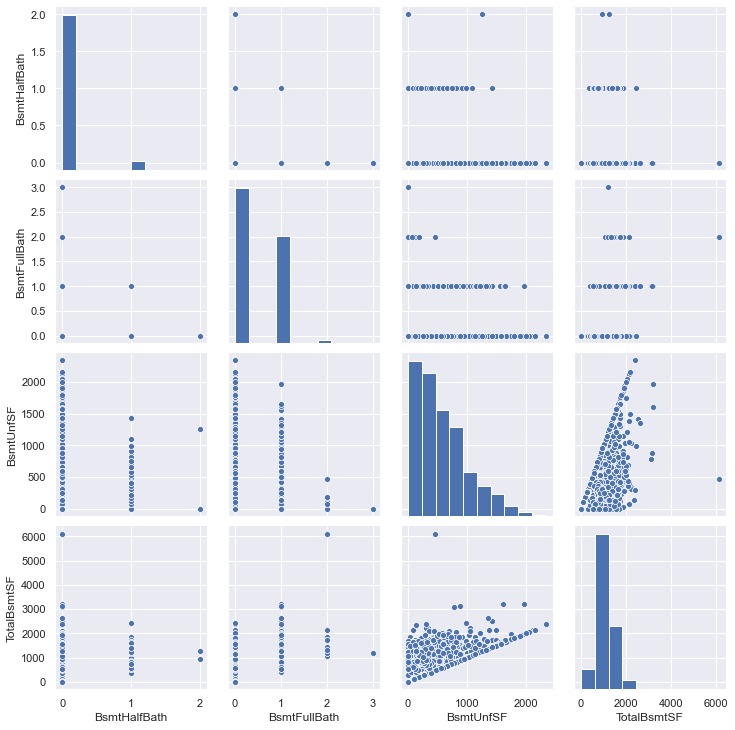

In [21]:
BSM_cols = ['BsmtHalfBath', 'BsmtFullBath', 'BsmtUnfSF','TotalBsmtSF']
sns.pairplot(train_df[BSM_cols])

We can clearly see an inversely proportional correlation between most of them. As they are strongly correlated, we are going to drop them except *TotalBsmtSF*, which among all *BsmtX* (non-categorical), is the most one correlated with *SalePrice* column

In [22]:
def drop_column(df, column):
    return df.drop([column], axis=1, inplace=True)     #Drop column

def fill_str_values(df, column):
    df[column]=df[column].fillna(df[column].mode()[0])   #If string mode
    return df[column]

def fill_num_values(df, column):
    df[column]=df[column].fillna(df[column].mean)       #If number mean
    return df[column]    

In [23]:
drop_column(train_df, 'PoolQC')
drop_column(train_df, 'MiscFeature')
drop_column(train_df, 'Alley')
drop_column(train_df, 'Fence')
drop_column(train_df, 'GarageCond')
drop_column(train_df, 'GarageFinish')
drop_column(train_df, 'GarageQual')
drop_column(train_df, 'GarageType')
drop_column(train_df, 'GarageYrBlt')
drop_column(train_df, 'BsmtFinSF1')
drop_column(train_df, 'BsmtFinSF2')
drop_column(train_df, 'BsmtUnfSF')
drop_column(train_df, 'BsmtFullBath')
drop_column(train_df, 'BsmtHalfBath')

fill_str_values(train_df, 'FireplaceQu')
fill_str_values(train_df, 'BsmtExposure')
fill_str_values(train_df, 'BsmtFinType1')
fill_str_values(train_df, 'BsmtFinType2')
fill_str_values(train_df, 'BsmtCond')
fill_str_values(train_df, 'BsmtQual')
fill_str_values(train_df, 'MasVnrType')
fill_str_values(train_df, 'Electrical')

fill_num_values(train_df, 'LotFrontage')
fill_num_values(train_df, 'MasVnrArea')

0       196
1         0
2       162
3         0
4       350
       ... 
1455      0
1456    119
1457      0
1458      0
1459      0
Name: MasVnrArea, Length: 1460, dtype: object

We check that 14 columns have been removed, and if there is still any missing value:

In [24]:
train_df.shape

(1460, 67)

In [25]:
train_df.isnull().sum().sort_values(ascending=False)

SalePrice      0
OverallQual    0
BsmtCond       0
BsmtQual       0
Foundation     0
              ..
Electrical     0
CentralAir     0
HeatingQC      0
Heating        0
Id             0
Length: 67, dtype: int64

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Preparing test data

Now we need to check if our test data is correctly provided, or maybe we need to make some changes as in the training data.

In [26]:
test_df=pd.read_csv('test.csv')

In [27]:
test_df.shape

(1459, 80)

In [28]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


As we did in our train data:

In [29]:
test_df['GrLivArea'] = np.log(test_df['GrLivArea'])

We check the nule values:

In [30]:
obj_test=test_df.isnull().sum().sort_values(ascending=False)
for key,value in obj_test.iteritems():
    if value != 0:
        print(key,",",value, ",", ' %% missing: %.2f %%' %(value/1459*100))

PoolQC , 1456 ,  % missing: 99.79 %
MiscFeature , 1408 ,  % missing: 96.50 %
Alley , 1352 ,  % missing: 92.67 %
Fence , 1169 ,  % missing: 80.12 %
FireplaceQu , 730 ,  % missing: 50.03 %
LotFrontage , 227 ,  % missing: 15.56 %
GarageCond , 78 ,  % missing: 5.35 %
GarageQual , 78 ,  % missing: 5.35 %
GarageYrBlt , 78 ,  % missing: 5.35 %
GarageFinish , 78 ,  % missing: 5.35 %
GarageType , 76 ,  % missing: 5.21 %
BsmtCond , 45 ,  % missing: 3.08 %
BsmtQual , 44 ,  % missing: 3.02 %
BsmtExposure , 44 ,  % missing: 3.02 %
BsmtFinType1 , 42 ,  % missing: 2.88 %
BsmtFinType2 , 42 ,  % missing: 2.88 %
MasVnrType , 16 ,  % missing: 1.10 %
MasVnrArea , 15 ,  % missing: 1.03 %
MSZoning , 4 ,  % missing: 0.27 %
BsmtHalfBath , 2 ,  % missing: 0.14 %
Utilities , 2 ,  % missing: 0.14 %
Functional , 2 ,  % missing: 0.14 %
BsmtFullBath , 2 ,  % missing: 0.14 %
BsmtFinSF2 , 1 ,  % missing: 0.07 %
BsmtFinSF1 , 1 ,  % missing: 0.07 %
Exterior2nd , 1 ,  % missing: 0.07 %
BsmtUnfSF , 1 ,  % missing: 0.07 %

We can see there are even more missing values in test data than in our train data.

We will drop first 4 columns as we did in training data, due to the fact that missing values are over 50% of total values, as well as the *Garage* and *XBsmt* columns.

In training data we did not drop the column `FirePlaceQu`, beacuse it had less than a 50% of missing values, nevertheless, in test data, we can see that the missing values comprise the 50% of total values.

We can drop this column as it will bring high uncertainity. We can ensure that this dropping will not spoil our final results, because we saw at the beginning of the project that this columnn is not contributing much to our final price.

In [31]:
drop_column(train_df, 'FireplaceQu')

drop_column(test_df, 'FireplaceQu')
drop_column(test_df, 'PoolQC')
drop_column(test_df, 'MiscFeature')
drop_column(test_df, 'Alley')
drop_column(test_df, 'Fence')
drop_column(test_df, 'GarageCond')
drop_column(test_df, 'GarageFinish')
drop_column(test_df, 'GarageQual')
drop_column(test_df, 'GarageType')
drop_column(test_df, 'GarageYrBlt')
drop_column(test_df, 'BsmtFinSF1')
drop_column(test_df, 'BsmtFinSF2')
drop_column(test_df, 'BsmtUnfSF')
drop_column(test_df, 'BsmtFullBath')
drop_column(test_df, 'BsmtHalfBath')



fill_str_values(test_df, 'BsmtExposure')
fill_str_values(test_df, 'BsmtFinType1')
fill_str_values(test_df, 'BsmtFinType2')
fill_str_values(test_df, 'BsmtCond')
fill_str_values(test_df, 'BsmtQual')
fill_str_values(test_df, 'MasVnrType')
fill_str_values(test_df, 'MSZoning')
fill_str_values(test_df, 'Functional')
fill_str_values(test_df, 'Utilities')
fill_str_values(test_df, 'Exterior2nd')
fill_str_values(test_df, 'SaleType')
fill_str_values(test_df, 'Exterior1st')
fill_str_values(test_df, 'KitchenQual')
fill_str_values(test_df, 'TotalBsmtSF')
fill_str_values(test_df, 'GarageArea')
fill_str_values(test_df, 'GarageCars')



fill_num_values(test_df, 'LotFrontage')
fill_num_values(test_df, 'MasVnrArea')

0         0
1       108
2         0
3        20
4         0
       ... 
1454      0
1455      0
1456      0
1457      0
1458     94
Name: MasVnrArea, Length: 1459, dtype: object

We check that 10 columns have been removed, and if there is still any missing value:

In [32]:
test_df.shape

(1459, 65)

In [33]:
train_df.shape

(1460, 66)

In [34]:
test_df.isnull().sum().sort_values(ascending=False)

SaleCondition    0
BsmtExposure     0
BsmtQual         0
Foundation       0
ExterCond        0
                ..
CentralAir       0
HeatingQC        0
Heating          0
TotalBsmtSF      0
Id               0
Length: 65, dtype: int64

The `Id` column labels each house, but at the time of estimating the final price, this column is irrelevant. Thus, we are going to drop it in both training and test data.

In [35]:
drop_column(train_df, 'Id')
drop_column(test_df, 'Id')

_______________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________

## Handle categorical features

Now, we need to convert the categorical variables into numerical data so that we can work properly with our machine learning algorithms (regression requieres numerical data). In order to do this we will be using [*Dummy Variable Encoding*](https://www.geeksforgeeks.org/how-to-convert-categorical-string-data-into-numeric-in-python/#:~:text=We%20will%20be%20using%20.,fit_transform()%20in%20the%20process.) from `Pandas` library.

We show all the categorical data columns:

In [36]:
categ_columns=train_df.select_dtypes('O').columns.to_list()  #Create list of categorical data
print(categ_columns)
print(len(categ_columns))


['MSZoning', 'LotFrontage', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'PavedDrive', 'SaleType', 'SaleCondition']
36


For carrying out this process faster, we are going to concatenate training and test data, change categorical data into numerical data, and after it we will split both datasets again.

We concatenate both dataframes

In [37]:
all_df = pd.concat((train_df, test_df)).reset_index(drop=True)

We will loop through the categorical columns, and apply the dummies algorithm:

In [38]:
for i in range(len(categ_columns)):
    
    df1=pd.get_dummies(all_df[categ_columns[i]])
    
    all_df= pd.concat([all_df, df1], axis=1).reindex(all_df.index)
    
    all_df.drop(categ_columns[i], axis=1, inplace=True)

In [39]:
all_df.shape

(2919, 820)

We need to remove duplicated columns:

In [40]:
all_df = all_df.loc[:,~all_df.columns.duplicated()]

Let's explore the dataframe

In [41]:
all_df.shape

(2919, 664)

In [42]:
all_df.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,ConLw,New,Oth,WD,Abnorml,AdjLand,Alloca,Family,Normal,Partial
0,60,8450,7,5,2003,2003,856.0,856,854,0,...,0,0,0,1,0,0,0,0,1,0
1,20,9600,6,8,1976,1976,1262.0,1262,0,0,...,0,0,0,1,0,0,0,0,1,0
2,60,11250,7,5,2001,2002,920.0,920,866,0,...,0,0,0,1,0,0,0,0,1,0
3,70,9550,7,5,1915,1970,756.0,961,756,0,...,0,0,0,1,1,0,0,0,0,0
4,60,14260,8,5,2000,2000,1145.0,1145,1053,0,...,0,0,0,1,0,0,0,0,1,0


Once we changed the type of the categorical data to numerical data, we need to split again the data sets to apply and train our machine learning models.

In [43]:
df_Train=all_df.iloc[:1460, :]
df_Test=all_df.iloc[1460:, :]

From the test dataframe, we need to remove the *SalePrice* column, as it has Nan values:

In [44]:
df_Test.columns.get_loc('SalePrice')

28

In [45]:
df_Test.shape

(1459, 664)

In [46]:
df_Test.drop(['SalePrice'], axis=1, inplace=True)

C:\Users\Jorge\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [47]:
df_Test.shape

(1459, 663)

In [48]:
df_Train.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,ConLw,New,Oth,WD,Abnorml,AdjLand,Alloca,Family,Normal,Partial
0,60,8450,7,5,2003,2003,856.0,856,854,0,...,0,0,0,1,0,0,0,0,1,0
1,20,9600,6,8,1976,1976,1262.0,1262,0,0,...,0,0,0,1,0,0,0,0,1,0
2,60,11250,7,5,2001,2002,920.0,920,866,0,...,0,0,0,1,0,0,0,0,1,0
3,70,9550,7,5,1915,1970,756.0,961,756,0,...,0,0,0,1,1,0,0,0,0,0
4,60,14260,8,5,2000,2000,1145.0,1145,1053,0,...,0,0,0,1,0,0,0,0,1,0


We will move *SalePrice* column in train data to the end, so that the indices of the columns of both data sets match.

In [49]:
df_Train.columns.get_loc('SalePrice')

28

In [50]:
price_col=df_Train.iloc[:,28]
print(price_col)

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, Length: 1460, dtype: float64


In [51]:
df_Train.drop(['SalePrice'], axis=1, inplace=True)

C:\Users\Jorge\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [52]:
df_Train.insert(loc=663, column='SalePrice', value=price_col)

In [53]:
df_Train.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,New,Oth,WD,Abnorml,AdjLand,Alloca,Family,Normal,Partial,SalePrice
0,60,8450,7,5,2003,2003,856.0,856,854,0,...,0,0,1,0,0,0,0,1,0,12.247694
1,20,9600,6,8,1976,1976,1262.0,1262,0,0,...,0,0,1,0,0,0,0,1,0,12.109011
2,60,11250,7,5,2001,2002,920.0,920,866,0,...,0,0,1,0,0,0,0,1,0,12.317167
3,70,9550,7,5,1915,1970,756.0,961,756,0,...,0,0,1,1,0,0,0,0,0,11.849398
4,60,14260,8,5,2000,2000,1145.0,1145,1053,0,...,0,0,1,0,0,0,0,1,0,12.429216


# Results

We split the train data and define the parameters:

In [54]:
X_train=df_Train.drop(['SalePrice'], axis=1)
y_train=df_Train['SalePrice']  #What we want to predict 
X_test=df_Test

## Linear Regression

This technique models the relationship between the target variable and the independent variables (predictors). It fits a linear model with coefficients to the data in order to minimize the residual sum of squares between the target variable in the dataset, and the predicted values by the linear approximation.

We will start by predicting the *SalePrice* with this model:

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [56]:
reg = LinearRegression().fit(X_train, y_train)   #We fit training data

In [57]:
reg.score(X_train, y_train)

0.9590132451995579

Our training data fits the model very well with almost a 1.0 coefficient of prediction value. The model has a 5% of uncertainity in this training part.

In [58]:
reg.intercept_

2.9014252372498675

In [59]:
reg.coef_

array([-5.24144229e-04,  2.71658717e-06,  4.58452494e-02,  4.05793934e-02,
        1.95137961e-03,  7.48734511e-04,  1.11148694e-04,  3.21054519e-05,
        1.20088570e-04,  2.19822311e-04,  3.36391402e-01,  2.38143521e-02,
        1.71568620e-02, -1.44754105e-02, -8.44550908e-02,  6.16195303e-03,
        2.21213994e-02,  2.30702023e-02,  1.21541545e-04,  8.62438160e-05,
        9.19051902e-05,  1.23522800e-04, -6.87448630e-05,  2.34816844e-04,
        2.43926831e-04, -7.67357313e-06, -1.18001424e-03,  6.29162378e-05,
       -3.31447108e-01,  1.40708495e-01,  6.90118590e-02,  8.78667611e-02,
        3.38599923e-02, -1.67569718e-02,  5.76313684e-03, -4.63257970e-02,
       -1.31681076e-02,  3.31229885e-03, -4.27817461e-02,  2.09027907e-02,
        5.21198291e-04, -5.49698244e-02, -4.58508494e-02,  7.54300388e-03,
        1.73913796e-01,  1.53032384e-02,  3.96161549e-02,  1.39552057e-01,
        5.74577867e-03, -1.91372405e-02,  4.44719593e-02, -6.39591881e-02,
        2.01385276e-02,  

In [60]:
predictions=reg.predict(df_Test)

Here we have the *SalePrice* predicted values for our test data. We can check how accurate our model is by comparing them to the sample that kaggle provides.

In [61]:
print(predictions)

[11.69107725 11.86157501 12.13252633 ... 12.13584532 11.714232
 12.31734314]


In [62]:
sample_df=pd.read_csv('sample_submission.csv') #Kaggle sample

In [63]:
sample_df.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [64]:
sample_df.drop(['Id'], axis=1, inplace=True) #We remove Id column

In [65]:
sample_df['SalePrice']=np.log(sample_df['SalePrice']) #We are working with log

In [66]:
sample_df.head()

,SalePrice
0,12.039292
1,12.142911
2,12.120426
3,12.096913
4,11.923246


In [67]:
print ('MAE is:', mean_absolute_error(sample_df, predictions))
print ('MSE is:', mean_squared_error(sample_df, predictions))
print ('RMSE is:', np.sqrt(mean_squared_error(sample_df, predictions)))

MAE is: 0.31706022035335535
MSE is: 0.1547802189649356
RMSE is: 0.3934211724919435


We will apply other Machine Learning models, and at the end, we will discuss from the results, which is the most accurate one, and we will try to explain why.

## Nearest Neighbors

Nearest Neighbors is a type of instance-based learning. For this technique, the model tries to find a number (k) of training examples closest in distance to a new point, and predict the output for this new point from these closest neighbors. K can be a user-defined number (k-nearest neighbors), or vary based on the local density of points (radius-based neighbors). The distance metric used to measure the closeness is mostly the Euclidean distance.

In [68]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [69]:
parameter_space = {"n_neighbors": [9, 10, 11,50], "weights": ["uniform", "distance"], "algorithm": ["ball_tree", "kd_tree", "brute"], 
                   "leaf_size": [1,2,20,50,200]}


clf = GridSearchCV(KNeighborsRegressor(), parameter_space, cv=3,    #search for the best model parameters in a parameter space provided by us.
                   scoring="neg_mean_absolute_error", n_jobs=4)

clf.fit(X_train, y_train)

print("Best parameters:")
print(clf.best_params_)

Best parameters:
{'algorithm': 'ball_tree', 'leaf_size': 1, 'n_neighbors': 9, 'weights': 'distance'}


We defined the parameter space (best choice for this case)

In [70]:
knn_model = KNeighborsRegressor(**clf.best_params_)

We train our model using our training set:

In [71]:
knn_model.fit(X_train, y_train);

We evaluate the model performance by comparing its predictions with the actual true values using metrics:

In [89]:
best_predictions = knn_model.predict(X_test)

print ('MAE is:', mean_absolute_error(sample_df, best_predictions))
print ('MSE is:', mean_squared_error(sample_df, best_predictions))
print ('RMSE is:', np.sqrt(mean_squared_error(sample_df, best_predictions)))

MAE is: 0.23724664318809857
MSE is: 0.08348313903311358
RMSE is: 0.28893448917205017


## Decision Tree

For this technique, the goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.

We will follow a similar procedure as we did with Nearest Neighbours:

- We find the best parameter space
- We fit the model
- Predict the test data
- Evaluate the model with metrics

In [73]:
from sklearn.tree import DecisionTreeRegressor

parameter_space = \
    {
        "criterion": ["mse", "friedman_mse", "mae"],
        "min_samples_split": [5, 18, 29, 50],
        "min_samples_leaf": [3, 7, 15, 25],
        "max_features": [20, 50, 150, 200, X_train.shape[1]],
    }

clf = GridSearchCV(DecisionTreeRegressor(random_state=3), parameter_space, 
                   cv=3, scoring="neg_mean_absolute_error", n_jobs=4)

clf.fit(X_train, y_train)
print("Best parameters:")
print(clf.best_params_)

Best parameters:
{'criterion': 'mse', 'max_features': 663, 'min_samples_leaf': 15, 'min_samples_split': 5}


In [74]:
dt_model = DecisionTreeRegressor(**clf.best_params_)

In [75]:
dt_model.fit(X_train, y_train);

In [76]:
predictions = dt_model.predict(X_test)

print ('MAE is:', mean_absolute_error(sample_df, predictions))
print ('MSE is:', mean_squared_error(sample_df, predictions))
print ('RMSE is:', np.sqrt(mean_squared_error(sample_df, predictions)))

MAE is: 0.3042194921982278
MSE is: 0.13888500736288223
RMSE is: 0.37267278859997577


## Random Forest

It is an ensemble method where many base models are used with a randomized subset of data to reduce the variance of a the base model.

### Working with numerical data

In [77]:
from sklearn.ensemble import RandomForestRegressor

parameter_space = \
    {
        "n_estimators": [10, 100, 300, 600],
        "criterion": ["rmse", "mae"],
        "max_depth": [7, 50, 254],
        "min_samples_split": [2, 5],
        "min_samples_leaf": [1, 5],
        "max_features": [19, 100, X_train.shape[1]],
        "bootstrap": [True, False],
    }

clf = RandomizedSearchCV(RandomForestRegressor(random_state=3), 
                         parameter_space, cv=3, n_jobs=4,
                         scoring="neg_mean_absolute_error", 
                         n_iter=10, random_state=3)

clf.fit(X_train, y_train)
print("Best parameters:")
print(clf.best_params_)

Best parameters:
{'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 100, 'max_depth': 7, 'criterion': 'mae', 'bootstrap': False}


In [78]:
rf_model = RandomForestRegressor(**clf.best_params_)

In [79]:
rf_model.fit(X_train, y_train);

In [80]:
predictions = rf_model.predict(X_test)

print ('MAE is:', mean_absolute_error(sample_df, predictions))
print ('MSE is:', mean_squared_error(sample_df, predictions))
print ('RMSE is:', np.sqrt(mean_squared_error(sample_df, predictions)))

MAE is: 0.2752711472049546
MSE is: 0.10724934766077593
RMSE is: 0.3274894619079764


# Discussion

In this Kaggle competition, result submissions are evaluated on Root Mean Sqaured Error (RMSE), thus, we are going to discuss specially this parameter.

| | Method | RMSE   | MSE   | MAE   |
|:---|:-------------|:-----------|:------|:------|
| 1 | Linear Regression  | 0.393 | 0.155  | 0.317 |
| 2 | Nearest Neighbours | 0.289| 0.155 | 0.237 |
| 3 | Decision Tree      |0.373 | 0.139  | 0.304 |
| 4 | Random Forest      | 0.326 | 0.106 |0.274  |

We can graph the results for RMSE:

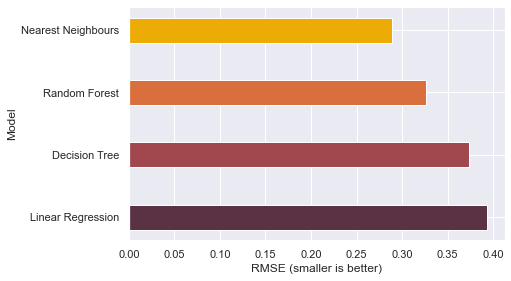

In [81]:
x=['Linear Regression', 'Decision Tree', 'Random Forest', 'Nearest Neighbours']
y=[0.393, 0.373, 0.326, 0.289]

colors = ["#5a3244", "#a1484f", "#d86f3d", "#edab06"]

fig, ax = plt.subplots()

plt.barh(y=range(len(x)), tick_label=x, width=y, height=0.4, color=colors);

ax.set(xlabel="RMSE (smaller is better)", ylabel="Model");

We can see that the model with a lowest value of RMSE is the Nearest Neighbour, and the one with highest value is the Linear Regression method. Specifically, the RMSE value for Linear Regression is **35%** higher than the value for the Nearest Neighbour method. 

The RMSE gives us an idea of how concentrated our data is around the line of best fit, as it measures the standard deviation of the residuals. Since the errors are squared before they are averaged, the RMSE gives a relatively high weight to large errors. This means the RMSE is most useful when large errors are particularly undesirable. 

In our case, we analysed the features that may contribute the most to the *SalePrice* and we manipulated them in a way that the data fit better. Furthermore, few columns were dropped in order to avoid multicollinearity. Nevertheless, there is still some source of error as RMSE is not nule.



Decision Tree and Random Forest algorithms have similar RMSE value. However, Random Forest value is lower. We can try to see the importance of each feature in the dataset after fitting these two models (It may help us to discuss why Random Forest is more accurate than Decision Tree method).

We will show graphically only the most important ones.

**For random forest**

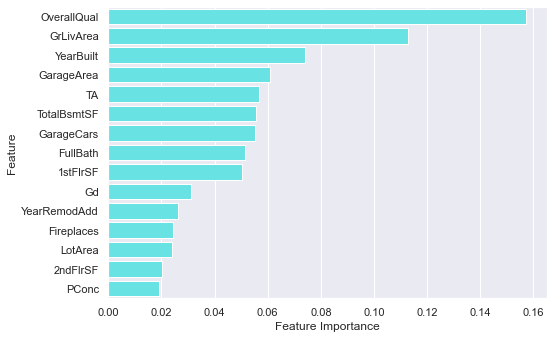

In [82]:
rf_feature_importances = rf_model.feature_importances_
rf_feature_importances = pd.Series(
    rf_feature_importances, index=X_train.columns.values
    ).sort_values(ascending=False).head(15)

fig, ax = plt.subplots(figsize=(7,5))
sns.barplot(x=rf_feature_importances, 
            y=rf_feature_importances.index, 
            color="#55f6f7");
plt.xlabel('Feature Importance');
plt.ylabel('Feature');


**For decision tree**

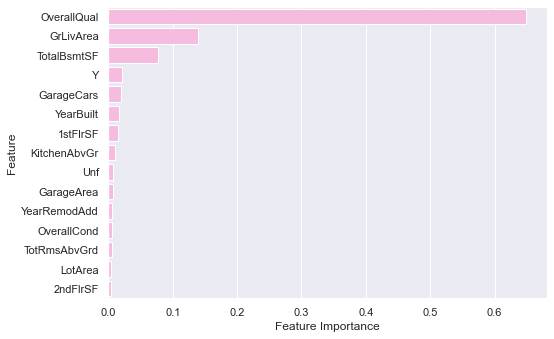

In [83]:
dt_feature_importances = dt_model.feature_importances_
dt_feature_importances = pd.Series(
    dt_feature_importances, index=X_train.columns.values
    ).sort_values(ascending=False).head(15)

fig, ax = plt.subplots(figsize=(7,5))
sns.barplot(x=dt_feature_importances, 
            y=dt_feature_importances.index, 
            color="#ffb3e2");
plt.xlabel('Feature Importance');
plt.ylabel('Feature');

**Let's compare both methods:**

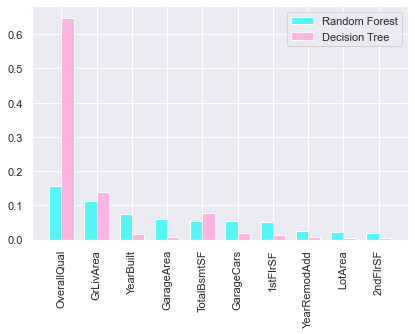

In [84]:
common_imp_feat = [x for x in rf_feature_importances.index 
                   if x in dt_feature_importances.index]
commImpFeat_rf_scores = [rf_feature_importances[x] 
                          for x in common_imp_feat]
commImpFeat_dt_scores = [dt_feature_importances[x] 
                         for x in common_imp_feat]

ind = np.arange(len(commImpFeat_rf_scores))
width = 0.35

fig, ax = plt.subplots()
ax.bar(ind - width/2, commImpFeat_rf_scores, width,
       color='#55f6f7', label='Random Forest');
ax.bar(ind + width/2, commImpFeat_dt_scores, width, 
       color='#ffb3e2', label='Decision Tree')
ax.set_xticks(ind);
ax.set_xticklabels(common_imp_feat);
ax.legend();
plt.xticks(rotation=90);

As we can see, random forest leverages the power of multiple decision trees. It does not rely on the feature importance given by a single decision tree. 

In the graph is clearly seen that, the decision tree model gives high importance to a particular set of features. But the random forest chooses features randomly during the training process. Therefore, it does not depend highly on any specific set of features. 

We can conclude that the random forest can generalize over the data in a better way, being its randomized feature selection what makes it more accurate than the decision tree method. Nevertheless, we need to take into account that random forest method has a higher training time than a single decision tree, and as we increase the number of trees in a random forest, the time taken to train each of them also increases.

We can analyse the computation time of each method:



In [85]:
print ('Computation time in training Linear Regression method:')
%timeit A = LinearRegression().fit(X_train, y_train)
print()

print ('Computation time in training Nearest Neighbours method:')
%timeit B = knn_model.fit(X_train, y_train)
print()

print ('Computation time in training Decision Tree method:')
%timeit C = dt_model.fit(X_train, y_train)
print()

print ('Computation time in training Random Forest method:')
%timeit D = rf_model.fit(X_train, y_train)

Computation time in training Linear Regression method:
74.9 ms ± 1.47 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)

Computation time in training Nearest Neighbours method:
97.3 ms ± 2.6 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)

Computation time in training Decision Tree method:
35.5 ms ± 893 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)

Computation time in training Random Forest method:
43 s ± 3.24 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


Clearly, we can see that the computation time of the Random Forest method is really high, it is almost 1 minute long, and even, this is not the most accurate method.

Random Forest it the least efficient method, however it is the second most accurate one.

If we take into account the precision and efficiency of Random Forest and Decision Tree, we can see that Decision Tree method is **7%** less accurate than Random Forest method, but Decision Tree algorithm is **1316** times more efficient than the Random Forest one.

Then, it is our decision if we want to sacrify accuracy for efficiency.

The Random Forest algorithm may be more efficient if we reduce the number of trees in the model. However, the accuracy will decrease.

The Nearest Neighbour method is not the most efficient one, but its accuracy makes it the best model for predicting the *SalePrice* of our data, so we can conclude that the balance precision-efficiency is well achieved.

# Conclusion

To put the matter in a nutshell, the Nearest Neighbour method is the best one to predict house prices from a large dataset. Preparing the data is a key step in order to achieve best resutls, however, in this project the cleaning data process may have not been the most adequate one. 

Regarding the machine learning model, we found that the best number of neighbours was 9, and Ball Tree algorithm was chosen for structuring the data for the Nearest Neighbour searching process.

The RMSE for this model has a value of **0.289**, and the computation time of the method is of **101 ms**.